In [1]:
!pip install transformers timm torch pillow
Step #2: Import libraries

Defaulting to user installation because normal site-packages is not writeable
  Using cached timm-1.0.21-py3-none-any.whl.metadata (62 kB)
  Using cached huggingface_hub-0.36.0-py3-none-any.whl.metadata (14 kB)
  Using cached safetensors-0.6.2-cp38-abi3-win_amd64.whl.metadata (4.1 kB)
   ---------------------------------------- 0.0/12.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/12.0 MB 10.5 MB/s eta 0:00:01
   ------------ --------------------------- 3.7/12.0 MB 10.9 MB/s eta 0:00:01
   -------------------- ------------------- 6.0/12.0 MB 11.2 MB/s eta 0:00:01
   --------------------------- ------------ 8.4/12.0 MB 11.3 MB/s eta 0:00:01
   ------------------------------------ --- 11.0/12.0 MB 11.3 MB/s eta 0:00:01
   ---------------------------------------- 12.0/12.0 MB 10.9 MB/s  0:00:01
Using cached huggingface_hub-0.36.0-py3-none-any.whl (566 kB)
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ------------------------------- -------- 2.

NameError: name 'Step' is not defined

In [2]:
from urllib.request import urlopen
from PIL import Image
import timm
import torch

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pydantic\_internal\_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pydantic\_internal\_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 

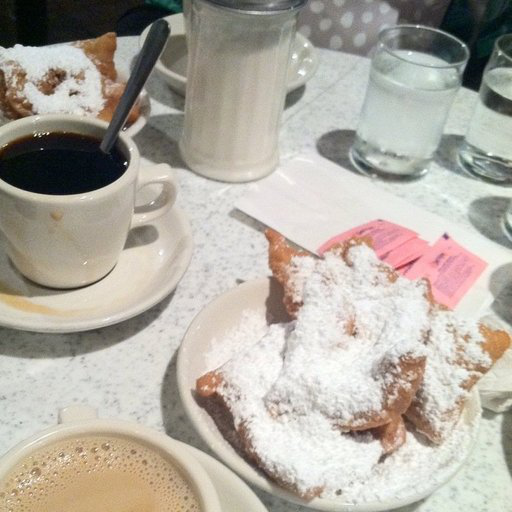

In [3]:
test_img_url1 = 'https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/beignets-task-guide.png'
test_img1 = Image.open(urlopen(test_img_url1))
test_img1

In [9]:
def predict_with_ImageNetV4(img):
 # Load the pretrained MobileNetV4 model from timm
 model_name = "hf_hub:timm/mobilenetv4_hybrid_large.ix_e600_r384_in1k"
 model = timm.create_model(model_name, pretrained=True)
 model = model.eval()
 # Get model specific transforms (normalization, resize)
 data_config = timm.data.resolve_data_config({}, model=model)
 transform = timm.data.create_transform(**data_config)

 # Apply the transforms and add batch dimension
 input_tensor = transform(img).unsqueeze(0)

 # Forward pass through the model
 with torch.no_grad():
     output = model(input_tensor)
 # Get the top-5 probabilities and class indices
 top5_probabilities, top5_class_indices = torch.topk(output.softmax(dim=1), k=5)

 # Convert probabilities to percentages
 top5_probabilities = top5_probabilities * 100

 # Print the top-5 probabilities and class indices
 print("Top-5 probabilities:")
 print(top5_probabilities)

 print("Top-5 class indices:")
 print(top5_class_indices)

 top5_class = top5_class_indices[0]
 list_form_c = top5_class.tolist()

 top5_prob = top5_probabilities[0]
 list_form_p = top5_prob.tolist()

 # map the class indices to the related word in image_net-1k
 predictions=[]
 for i in range(5):
   predictions.append([image_net_labels[list_form_c[i]], round(list_form_p[i], 2)])
 print(predictions)

In [10]:
predict_with_ImageNetV4(test_img1)

Top-5 probabilities:
tensor([[57.9506, 10.0320,  3.6789,  2.5263,  2.0686]])
Top-5 class indices:
tensor([[967, 968, 504, 415, 960]])


NameError: name 'image_net_labels' is not defined